In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [8]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

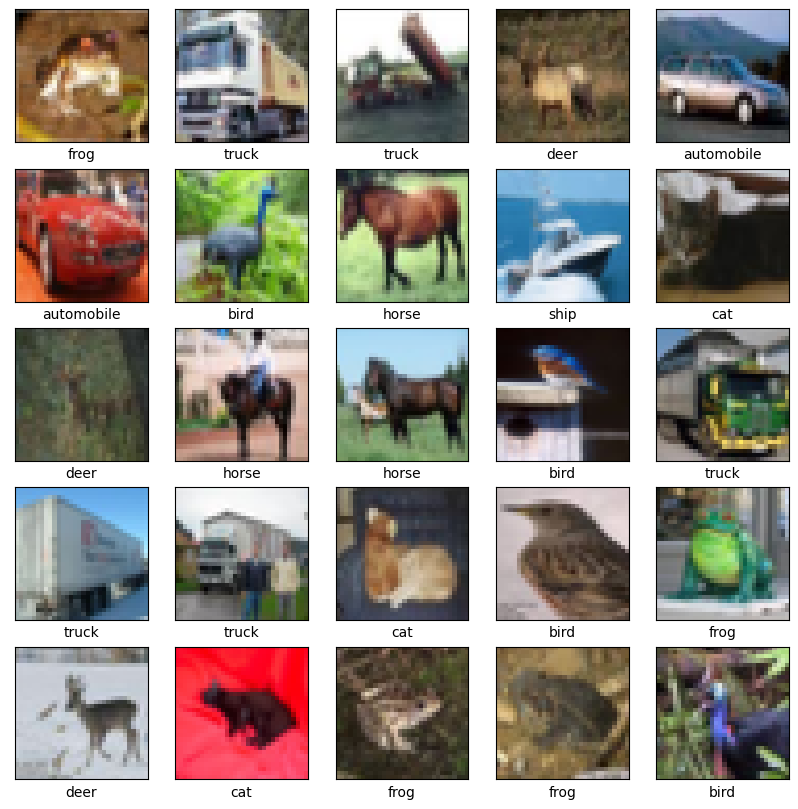

In [11]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [20]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [21]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 58s 36ms/step - loss: 1.5203 - accuracy: 0.4424 - val_loss: 1.2282 - val_accuracy: 0.5607
Epoch 2/10
1563/1563 [==============================] - 51s 32ms/step - loss: 1.1377 - accuracy: 0.5952 - val_loss: 1.0714 - val_accuracy: 0.6197
Epoch 3/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.9833 - accuracy: 0.6539 - val_loss: 0.9647 - val_accuracy: 0.6632
Epoch 4/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.8814 - accuracy: 0.6910 - val_loss: 0.9672 - val_accuracy: 0.6723
Epoch 5/10
1563/1563 [==============================] - 46s 29ms/step - loss: 0.8102 - accuracy: 0.7161 - val_loss: 0.9147 - val_accuracy: 0.6903
Epoch 6/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.7456 - accuracy: 0.7385 - val_loss: 0.8693 - val_accuracy: 0.7023
Epoch 7/10
1563/1563 [==============================] - 46s 30ms/step - loss: 0.6911 - accuracy: 0.7585 - val_loss: 0.8563 -

313/313 - 2s - loss: 0.9510 - accuracy: 0.6914 - 2s/epoch - 5ms/step


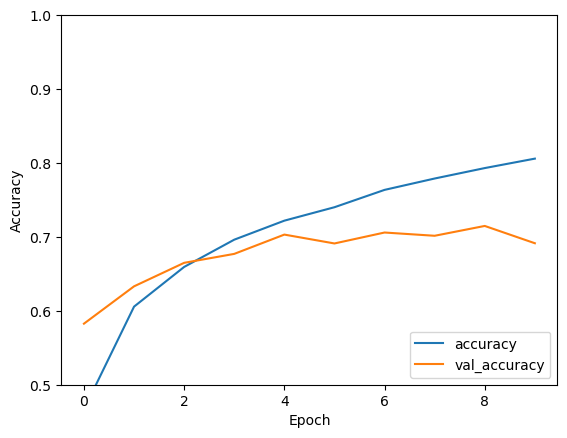

In [19]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 3s - loss: 0.8760 - accuracy: 0.7154 - 3s/epoch - 9ms/step


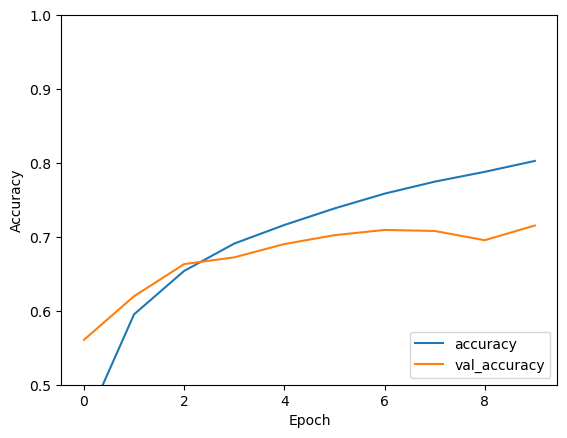

In [23]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)